## Fraud Detection EDA
### Exploratory Data Analysis for E-commerce and Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('ggplot')  
greenish_palette = ["#0073ff", "#3e7cc9", "#3a669d", "#5e7da3"]
sns.set_palette(greenish_palette)
%matplotlib inline

### 1. Data Loading

In [2]:
# Load datasets
data_dir = Path("../data/raw")
fraud_df = pd.read_csv(data_dir / "fraud_data.csv")
ip_df = pd.read_csv(data_dir / "ipaddress_to_country.csv")
credit_df = pd.read_csv(data_dir / "creditcard.csv")

### 2. E-commerce Data Analysis

In [3]:
# Convert datetime columns
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Basic info
print("📊 E-commerce Data Shape:", fraud_df.shape)
print("\n🔍 Missing Values:")
print(fraud_df.isna().sum())


📊 E-commerce Data Shape: (151112, 11)

🔍 Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


#### 2.1 Class Distribution

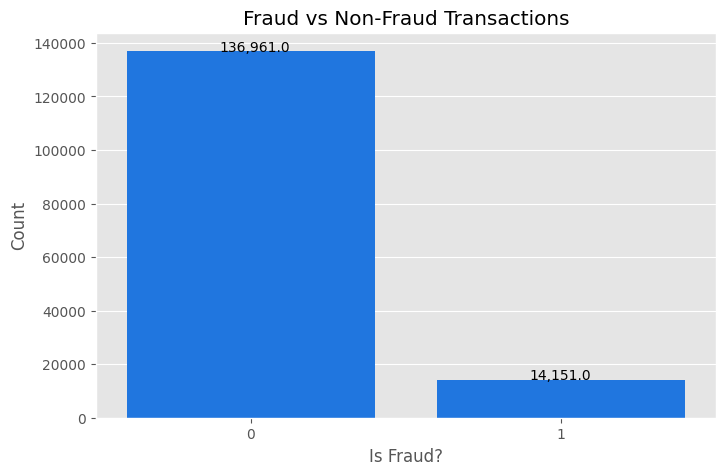

In [4]:
# Fraud vs Non-Fraud
plt.figure(figsize=(8,5))
fraud_counts = fraud_df['class'].value_counts()
ax = sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraud vs Non-Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Is Fraud?')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+50))
plt.show()

#### 2.2 Time Analysis

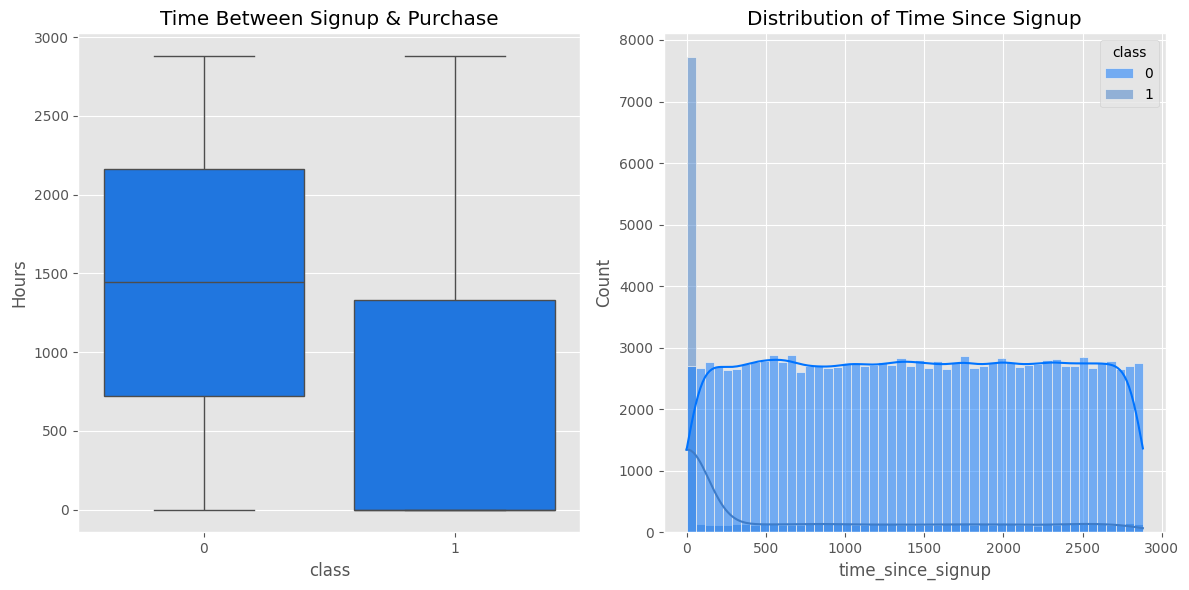

In [5]:
# Time between signup and purchase
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='class', y='time_since_signup', data=fraud_df)
plt.title('Time Between Signup & Purchase')
plt.ylabel('Hours')

plt.subplot(1,2,2)
sns.histplot(data=fraud_df, x='time_since_signup', hue='class', bins=50, kde=True)
plt.title('Distribution of Time Since Signup')
plt.tight_layout()
plt.show()

#### 2.3 Purchase Patterns

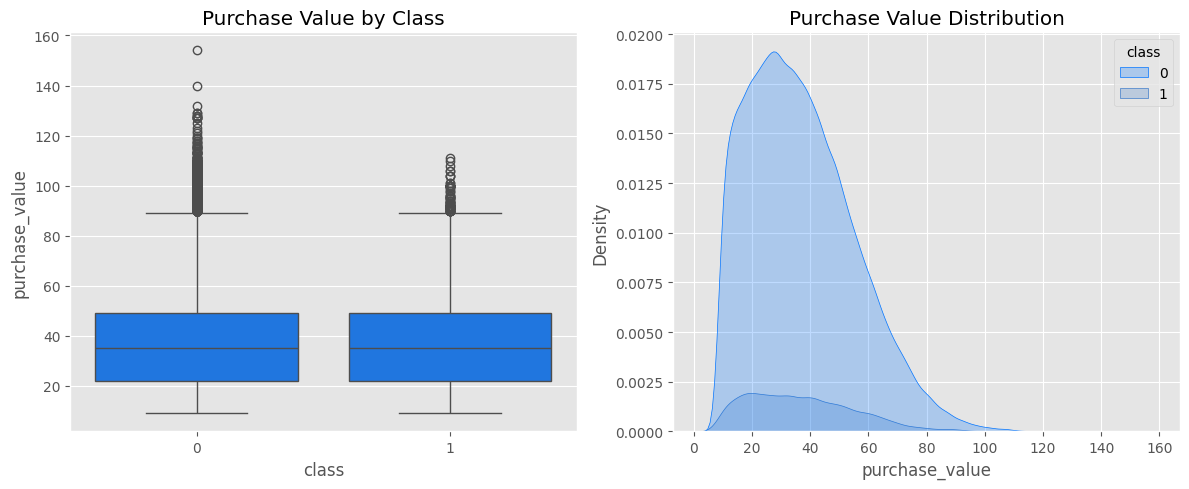

In [6]:
# Purchase value analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Class')

plt.subplot(1,2,2)
sns.kdeplot(data=fraud_df, x='purchase_value', hue='class', fill=True)
plt.title('Purchase Value Distribution')
plt.tight_layout()
plt.show()

#### 2.4 Device and Browser Analysis

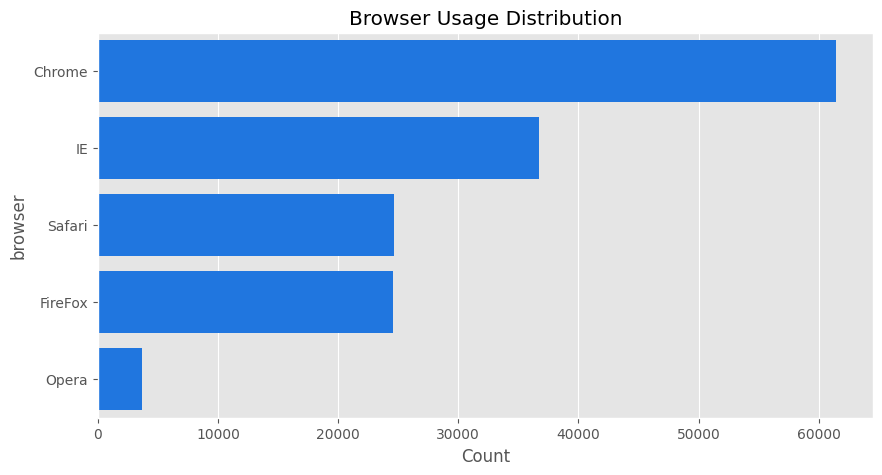

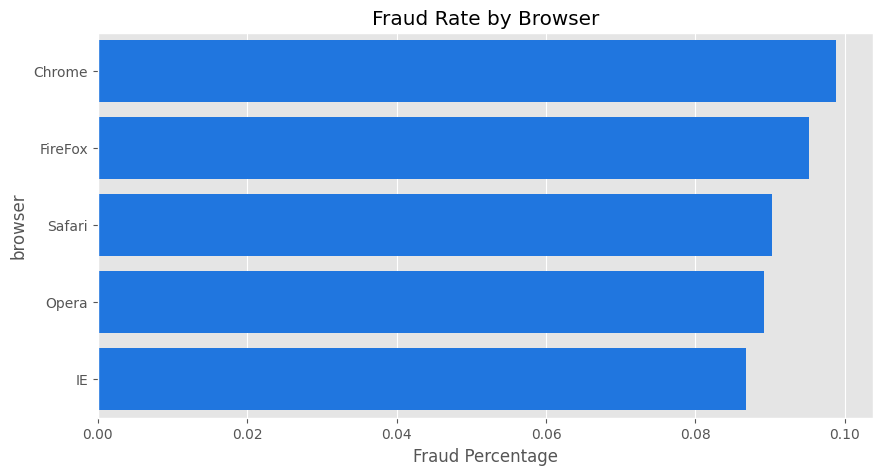

In [7]:
# Browser usage
plt.figure(figsize=(10,5))
browser_counts = fraud_df['browser'].value_counts()
sns.barplot(y=browser_counts.index, x=browser_counts.values)
plt.title('Browser Usage Distribution')
plt.xlabel('Count')
plt.show()

# Browser vs Fraud
browser_fraud = fraud_df.groupby('browser')['class'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(y=browser_fraud.index, x=browser_fraud.values)
plt.title('Fraud Rate by Browser')
plt.xlabel('Fraud Percentage')
plt.show()

#### 2.5 Geographic Analysis

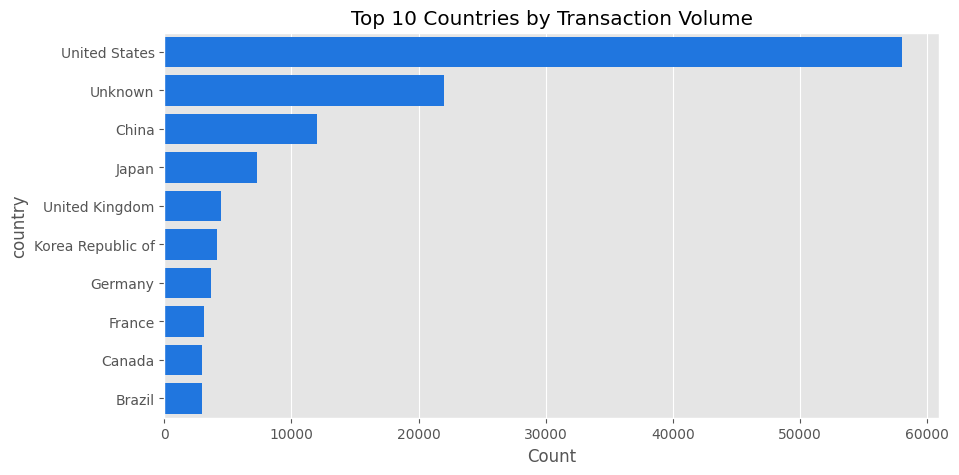

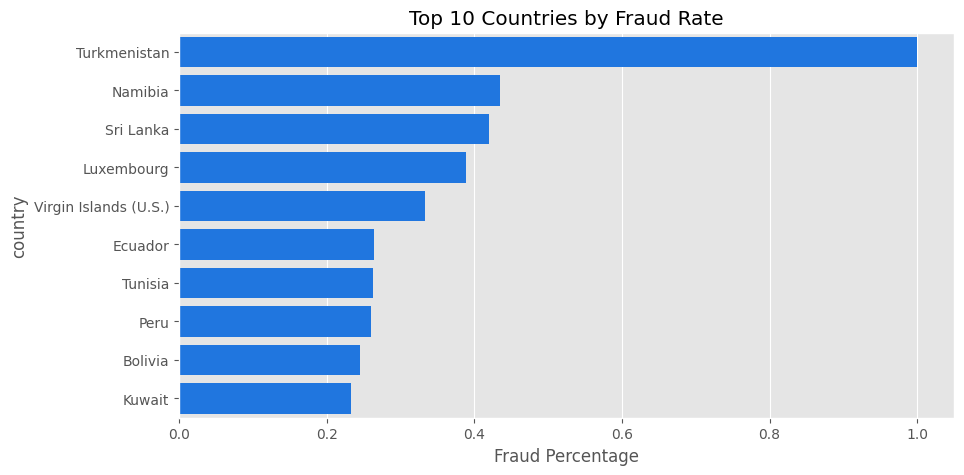

In [8]:
# Merge with IP data
fraud_df['ip_address'] = fraud_df['ip_address'].astype('int64')
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype('int64')

def find_country(ip, ip_df):
    match = ip_df[(ip_df['lower_bound_ip_address'] <= ip) & 
                 (ip_df['upper_bound_ip_address'] >= ip)]
    return match.iloc[0]['country'] if not match.empty else 'Unknown'

fraud_df['country'] = fraud_df['ip_address'].apply(find_country, ip_df=ip_df)

# Country analysis
top_countries = fraud_df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 10 Countries by Transaction Volume')
plt.xlabel('Count')
plt.show()

# Fraud by country
country_fraud = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=country_fraud.index, x=country_fraud.values)
plt.title('Top 10 Countries by Fraud Rate')
plt.xlabel('Fraud Percentage')
plt.show()

### 3. Credit Card Data Analysis

In [9]:
# Basic info
print("💳 Credit Card Data Shape:", credit_df.shape)
print("\n🔍 Missing Values:")
print(credit_df.isna().sum())

💳 Credit Card Data Shape: (284807, 31)

🔍 Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### 3.1 Class Distribution

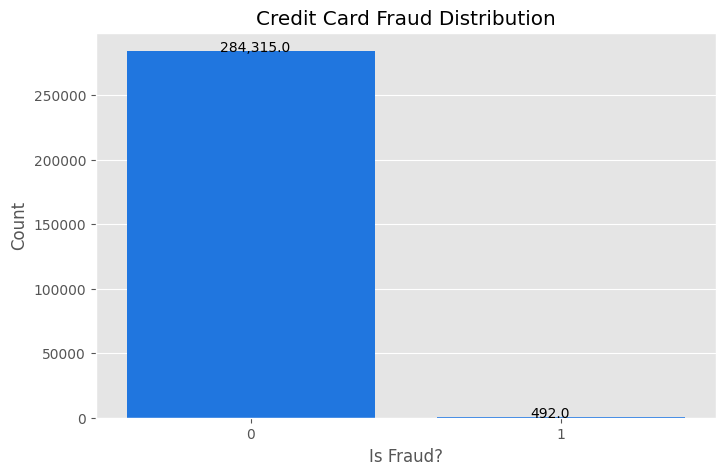

In [10]:
# Fraud vs Non-Fraud
plt.figure(figsize=(8,5))
fraud_counts = credit_df['Class'].value_counts()
ax = sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Credit Card Fraud Distribution')
plt.ylabel('Count')
plt.xlabel('Is Fraud?')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+50))
plt.show()

#### 3.2 Time Analysis

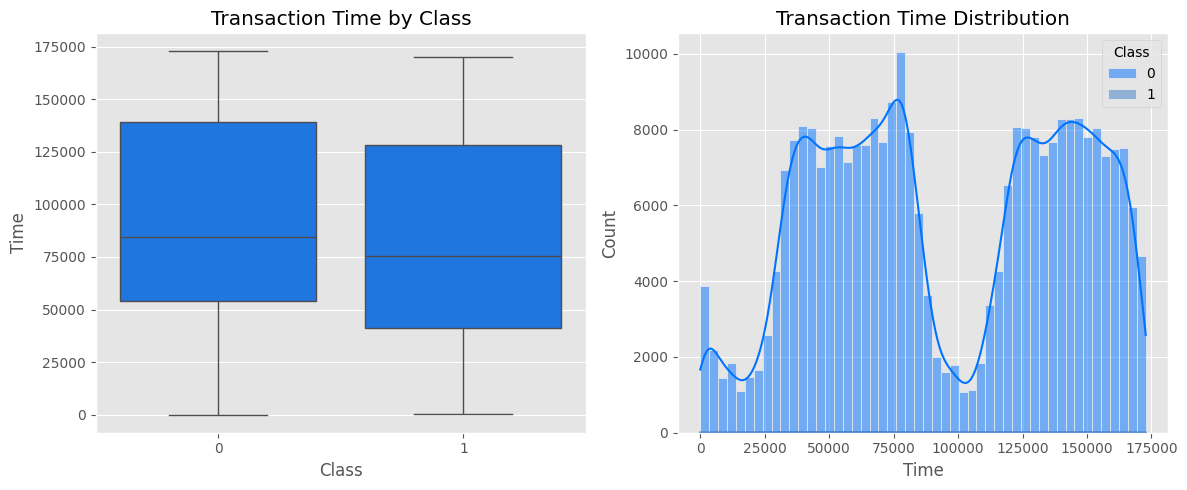

In [11]:
# Transaction time distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='Class', y='Time', data=credit_df)
plt.title('Transaction Time by Class')

plt.subplot(1,2,2)
sns.histplot(data=credit_df, x='Time', hue='Class', bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.tight_layout()
plt.show()

#### 3.3 Amount Analysis


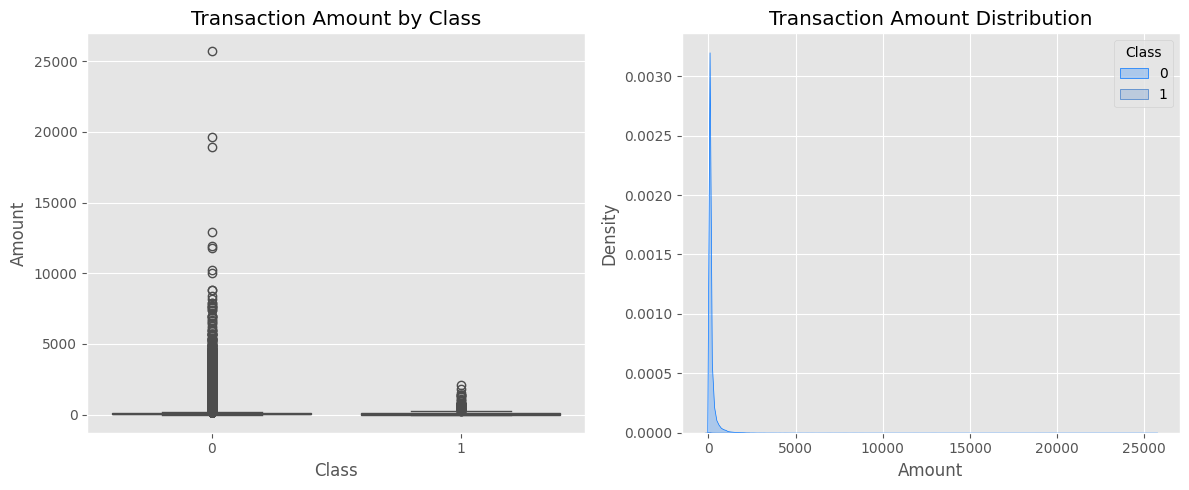

In [12]:
# Transaction amount analysis
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amount by Class')

plt.subplot(1,2,2)
sns.kdeplot(data=credit_df, x='Amount', hue='Class', fill=True)
plt.title('Transaction Amount Distribution')
plt.tight_layout()
plt.show()

### 4. Correlation Analysis

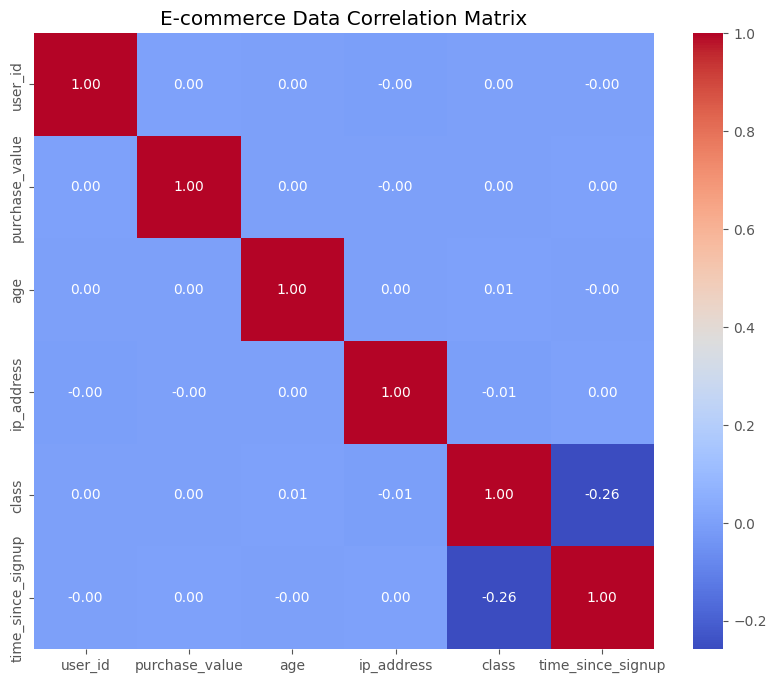

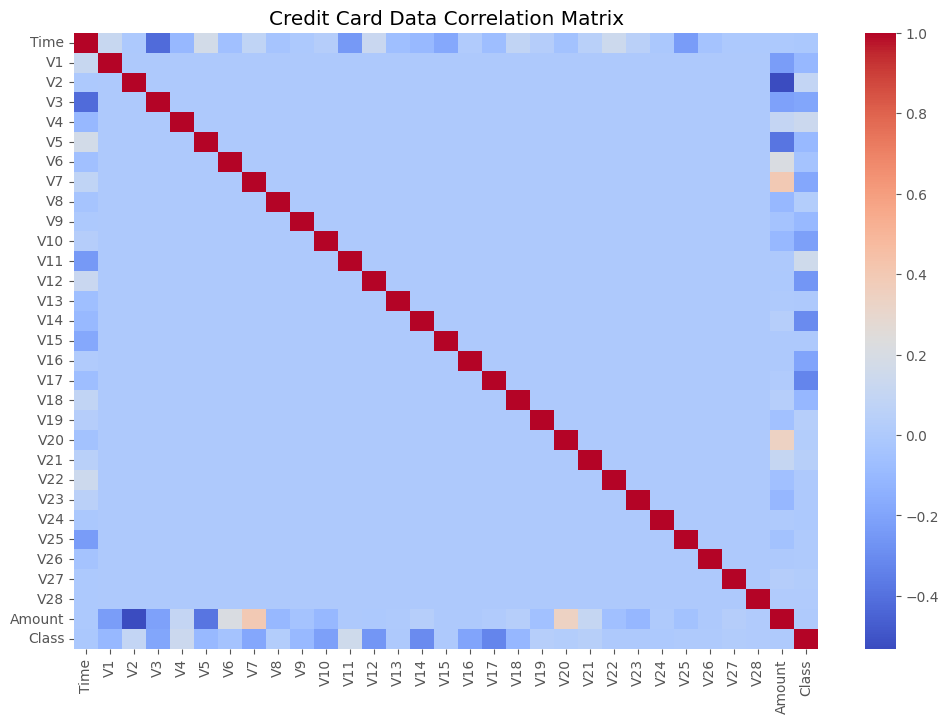

In [13]:
# E-commerce correlations
plt.figure(figsize=(10,8))
corr = fraud_df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('E-commerce Data Correlation Matrix')
plt.show()

# Credit card PCA features
plt.figure(figsize=(12,8))
corr = credit_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Credit Card Data Correlation Matrix')
plt.show()

### 5. Key Findings Summary

In [14]:
# Create summary tables
ecom_summary = pd.DataFrame({
    'Total Transactions': [fraud_df.shape[0]],
    'Fraud Percentage': [fraud_df['class'].mean()*100],
    'Avg Purchase Value (Fraud)': [fraud_df[fraud_df['class']==1]['purchase_value'].mean()],
    'Avg Purchase Value (Legit)': [fraud_df[fraud_df['class']==0]['purchase_value'].mean()],
    'Top Fraud Country': [fraud_df.groupby('country')['class'].mean().idxmax()],
    'Top Fraud Browser': [fraud_df.groupby('browser')['class'].mean().idxmax()]
})

credit_summary = pd.DataFrame({
    'Total Transactions': [credit_df.shape[0]],
    'Fraud Percentage': [credit_df['Class'].mean()*100],
    'Avg Amount (Fraud)': [credit_df[credit_df['Class']==1]['Amount'].mean()],
    'Avg Amount (Legit)': [credit_df[credit_df['Class']==0]['Amount'].mean()],
    'Max Fraud Time Window': [credit_df[credit_df['Class']==1]['Time'].mode()[0]]
})

print("🛒 E-commerce Fraud Summary")
display(ecom_summary)

print("\n💳 Credit Card Fraud Summary")
display(credit_summary)

🛒 E-commerce Fraud Summary


,Total Transactions,Fraud Percentage,Avg Purchase Value (Fraud),Avg Purchase Value (Legit),Top Fraud Country,Top Fraud Browser
0,151112,9.364577,36.993004,36.929418,Turkmenistan,Chrome



💳 Credit Card Fraud Summary


,Total Transactions,Fraud Percentage,Avg Amount (Fraud),Avg Amount (Legit),Max Fraud Time Window
0,284807,0.172749,122.211321,88.291022,68207.0
